# VQE ব্যবহার করে অণু অনুকরণ করা

এই টিউটোরিয়ালে, আমরা ভেরিয়েশনাল কোয়ান্টাম আইজেনসোলভার (VQE) প্রবর্তন করি, এর ব্যবহারকে অনুপ্রাণিত করি, প্রয়োজনীয় তত্ত্ব ব্যাখ্যা করি এবং অণুর স্থল অবস্থার শক্তি খুঁজে বের করার ক্ষেত্রে এর বাস্তবায়ন প্রদর্শন করি।

## ভূমিকা

অনেক অ্যাপ্লিকেশানে ম্যাট্রিক্সের ন্যূনতম eigenvalue বের করা গুরুত্বপূর্ণ। উদাহরণ স্বরূপ, রসায়নে, অণুকে চিহ্নিত করে একটি হার্মিটিয়ান ম্যাট্রিক্সের ন্যূনতম ইগেনভ্যালু হল সেই সিস্টেমের স্থল রাষ্ট্রীয় শক্তি। ভবিষ্যতে, ন্যূনতম eigenvalue খুঁজে পেতে কোয়ান্টাম ফেজ অনুমান অ্যালগরিদম ব্যবহার করা হতে পারে। যাইহোক, দরকারী সমস্যাগুলির উপর এর বাস্তবায়নের জন্য NISQ যুগে উপলব্ধ হার্ডওয়্যারের সীমা অতিক্রম করে সার্কিটের গভীরতা প্রয়োজন। এইভাবে, 2014 সালে, Peruzzo *et al.* প্রস্তাবিত VQE অনেক অগভীর সার্কিট ব্যবহার করে একটি অণুর স্থল অবস্থার শক্তি অনুমান করার জন্য [1]।

আনুষ্ঠানিকভাবে বলা হয়েছে, eigenstate $|\psi_{\text{min}}\rangle$-এর সাথে যুক্ত একটি অজানা সর্বনিম্ন eigenvalue $\lambda_{\text{min}}$ সহ একটি Hermitian ম্যাট্রিক্স $H$ দেওয়া, VQE একটি অনুমান প্রদান করে $\lambda_{\theta}$ সীমাবদ্ধ $\lambda_{\text{min}}$:

$$ \begin{aligned} \lambda_{\text{min}} \le \lambda_{\theta} \equiv \langle \psi(\theta) |H|\psi(\theta) \rangle \end{aligned}<br> $$

যেখানে $|\psi(\theta)\rangle$ হল $\lambda_{\theta}$ এর সাথে যুক্ত eigenstate। একটি প্যারামিটারাইজড সার্কিট প্রয়োগ করে, যা $U(\theta)$ দ্বারা উপস্থাপিত হয়, কিছু নির্বিচারে শুরুর অবস্থায় $|\psi\rangle$, অ্যালগরিদম একটি অনুমান $U(\theta)|\psi\rangle \equiv |\psi পায় (\theta)\rangle$ এ $|\psi_{\text{min}}\rangle$। $\theta$ পরামিতি পরিবর্তন করে $\langle \psi(\theta) |H|\psi(\theta) \rangle$-এর প্রত্যাশার মান কমিয়ে একটি ক্লাসিক্যাল কন্ট্রোলার দ্বারা অনুমানটি পুনরাবৃত্তিমূলকভাবে অপ্টিমাইজ করা হয়।


## কোয়ান্টাম মেকানিক্সের পরিবর্তনশীল পদ্ধতি

### গাণিতিক পটভূমি

VQE হল কোয়ান্টাম মেকানিক্সের পরিবর্তনশীল পদ্ধতির একটি প্রয়োগ। পরিবর্তনশীল পদ্ধতিটি আরও ভালভাবে বোঝার জন্য, কিছু প্রাথমিক গাণিতিক পটভূমি প্রদান করা হয়েছে। $A$ ম্যাট্রিক্সের একটি eigenvector, $|\psi_i\rangle$, $A$ দ্বারা একটি স্কেলার গুণক ধ্রুবক পর্যন্ত রূপান্তরের অধীনে অপরিবর্তনীয় (eigenvalue $\lambda_i$)। এটাই,

$$ \begin{aligned} A |\psi_i\rangle = \lambda_i |\psi_i\rangle \end{aligned} $$

অধিকন্তু, একটি ম্যাট্রিক্স $H$ হল হারমিটিয়ান যখন এটি তার নিজস্ব কনজুগেট ট্রান্সপোজের সমান।

$$ \begin{aligned} H = H^{\dagger} \end{aligned} $$

বর্ণালী উপপাদ্যটি বলে যে একটি হারমিটিয়ান ম্যাট্রিক্সের eigenvalues অবশ্যই বাস্তব হতে হবে। সুতরাং, $H$-এর যেকোনো eigenvalue-এর সম্পত্তি আছে যেটি `{latex} \lambda_i = \lambda_i^*` । যেহেতু যেকোন পরিমাপযোগ্য পরিমাণ অবশ্যই বাস্তব হতে হবে, হারমিটিয়ান ম্যাট্রিসগুলি কোয়ান্টাম সিস্টেমের হ্যামিলটোনিয়ানদের বর্ণনা করার জন্য উপযুক্ত। অধিকন্তু, $H$ হিসাবে প্রকাশ করা যেতে পারে

$$ \begin{aligned} H = \sum_{i = 1}^{N} \lambda_i |\psi_i\rangle \langle \psi_i | \end{aligned} $$

যেখানে প্রতিটি $\lambda_i$ হল eigenvector $|\psi_i\rangle$ এর সাথে সম্পর্কিত eigenvalue। তদুপরি, একটি নির্বিচারে কোয়ান্টাম অবস্থা $|\psi\rangle$-এ পর্যবেক্ষণযোগ্য $H$-এর প্রত্যাশা মান দেওয়া হয়

$$ \begin{aligned} \langle H \rangle_{\psi} &amp;\equiv \langle \psi | H | \psi \rangle \end{aligned} $$

$H$ এর প্রতিস্থাপন করে এর ইজেনভেক্টরের ওজনযুক্ত সমষ্টি হিসাবে উপস্থাপন করা,

$$ \begin{aligned} \langle H \rangle_{\psi} = \langle \psi | H | \psi \rangle &amp;= \langle \psi | \left(\sum_{i = 1}^{N} \lambda_i |\psi_i\rangle \langle \psi_i |\right) |\psi\rangle\ &amp;= \sum_{i = 1}^{N} \lambda_i \langle \psi | \psi_i\rangle \langle \psi_i | \psi\rangle \ &amp;= \sum_{i = 1}^{N} \lambda_i | \langle \psi_i | \psi\rangle |^2 \end{aligned} $$

শেষ সমীকরণটি দেখায় যে যেকোন অবস্থার উপর পর্যবেক্ষণযোগ্য একটি প্রত্যাশা মানকে ওজন হিসাবে $H$ এর সাথে যুক্ত eigenvalues ব্যবহার করে একটি রৈখিক সংমিশ্রণ হিসাবে প্রকাশ করা যেতে পারে। তাছাড়া, রৈখিক সংমিশ্রণে প্রতিটি ওজন 0-এর চেয়ে বেশি বা সমান, যেমন $| \langle \psi_i | \psi\rangle |^2 \ge 0$ এবং তাই এটি পরিষ্কার

$$ \begin{aligned} \lambda_{\text{min}} \le \langle H \rangle_{\psi} = \langle \psi | H | \psi \rangle = \sum_{i = 1}^{N} \lambda_i | \langle \psi_i | \psi\rangle |^2 \end{aligned} $$

উপরের সমীকরণটি **প্রকরণ পদ্ধতি** হিসাবে পরিচিত (কিছু গ্রন্থে এটি প্রকরণ নীতি হিসাবেও পরিচিত) [2]। এটি লক্ষ করা গুরুত্বপূর্ণ যে এটি বোঝায় যে কোনও তরঙ্গ ফাংশনের প্রত্যাশা মান সর্বদা কমপক্ষে $H$-এর সাথে যুক্ত ন্যূনতম eigenvalue হবে। তাছাড়া, eigenstate $|\psi_{\text{min}}\rangle$ এর প্রত্যাশা মান `{latex} \langle \psi_{\text{min}}|H|\psi_{\text{min}}\rangle = \langle \psi_{\text{min}}|\lambda_{\text{min}}|\psi_{\text{min}}\rangle = \lambda_{\text{min}}` দ্বারা দেওয়া হয়েছে `{latex} \langle \psi_{\text{min}}|H|\psi_{\text{min}}\rangle = \langle \psi_{\text{min}}|\lambda_{\text{min}}|\psi_{\text{min}}\rangle = \lambda_{\text{min}}` । সুতরাং, প্রত্যাশিত হিসাবে, <code>{latex} \langle H \rangle_{\psi_{\text{min}}}=\lambda_{\text{min}}</code> ।

### গ্রাউন্ড স্টেট আবদ্ধ

যখন একটি সিস্টেমের হ্যামিলটোনিয়ানকে হারমিটিয়ান ম্যাট্রিক্স $H$ দ্বারা বর্ণনা করা হয় তখন সেই সিস্টেমের স্থল অবস্থার শক্তি, $E_{gs}$, $H$ এর সাথে যুক্ত ক্ষুদ্রতম eigenvalue। নির্বিচারে একটি তরঙ্গ ফাংশন নির্বাচন করে $|\psi \rangle$ (যাকে *ansatz* বলা হয়) প্রাথমিক অনুমান হিসাবে $|\psi_{\text{min}}\rangle$, তার প্রত্যাশার মান গণনা করে, $\langle H \rangle_{ \psi}$, এবং পুনরাবৃত্তভাবে তরঙ্গ ফাংশন আপডেট করে, হ্যামিল্টোনিয়ানের গ্রাউন্ড স্টেট এনার্জিতে নির্বিচারে টাইট বাউন্ড পাওয়া যেতে পারে। 

## ভেরিয়েশনাল কোয়ান্টাম আইজেনসোলভার

### পরিবর্তনশীল ফর্ম

একটি কোয়ান্টাম কম্পিউটারে পরিবর্তনশীল পদ্ধতি প্রয়োগ করার জন্য ansatz এর পরিবর্তনের জন্য একটি পদ্ধতিগত পদ্ধতির প্রয়োজন। VQE একটি নির্দিষ্ট ফর্ম সহ একটি প্যারামিটারাইজড সার্কিট ব্যবহারের মাধ্যমে তা করে। এই ধরনের একটি সার্কিটকে প্রায়শই একটি *পরিবর্তনশীল রূপ* বলা হয় এবং এর ক্রিয়াটি রৈখিক রূপান্তর $U(\theta)$ দ্বারা প্রতিনিধিত্ব করা যেতে পারে। একটি ভেরিয়েশনাল ফর্ম একটি প্রারম্ভিক অবস্থায় প্রয়োগ করা হয় $|\psi\rangle$ (যেমন ভ্যাকুয়াম স্টেট $|0\rangle$, বা হার্ট্রি ফক স্টেট) এবং একটি আউটপুট স্টেট $U(\theta)|\psi\ তৈরি করে rangle\equiv |\psi(\theta)\rangle$। $|\psi(\theta)\rangle$ এর উপর পুনরাবৃত্তিমূলক অপ্টিমাইজেশনের লক্ষ্য হল একটি প্রত্যাশার মান `{latex} \langle \psi(\theta)|H|\psi(\theta)\rangle \approx E_{gs} \equiv \lambda_{\text{min}}` । আদর্শভাবে, $|\psi(\theta)\rangle$ $|\psi_{\text{min}}\rangle$ এর কাছাকাছি হবে (যেখানে 'ঘনিষ্ঠতা' রাষ্ট্রীয় বিশ্বস্ততা বা ম্যানহাটনের দূরত্ব দ্বারা চিহ্নিত করা হয়) যদিও বাস্তবে , $E_{gs}$-এ দরকারী সীমানা পাওয়া যেতে পারে এমনকি যদি এটি না হয়।

অধিকন্তু, বহুপদী সংখ্যার পরামিতি সহ একটি স্থির পরিবর্তনশীল ফর্ম শুধুমাত্র একটি সূচকীয় আকারের হিলবার্ট স্পেসে সমস্ত রাজ্যের বহুপদী আকারের সাবস্পেসে রূপান্তর ঘটাতে পারে। ফলস্বরূপ, বিভিন্ন বৈচিত্রপূর্ণ ফর্ম বিদ্যমান। কিছু, যেমন Ry এবং RyRz লক্ষ্য ডোমেনের বিবেচনা ছাড়াই হিউরিস্টিকভাবে ডিজাইন করা হয়েছে। অন্যরা, যেমন UCCSD, সমস্যাটির কাঠামোর উপর ভিত্তি করে ঘনিষ্ঠ অনুমান তৈরি করতে ডোমেন নির্দিষ্ট জ্ঞান ব্যবহার করে। সাধারণ পরিবর্তনশীল ফর্মগুলির গঠন এই নথিতে পরে আরও গভীরতার সাথে আলোচনা করা হয়েছে।

### Simple Variational Forms

একটি পরিবর্তনশীল ফর্ম তৈরি করার সময় আমাদের অবশ্যই দুটি বিপরীত লক্ষ্যের ভারসাম্য বজায় রাখতে হবে। আদর্শভাবে, আমাদের $n$ qubit ভেরিয়েশনাল ফর্ম যেকোনো সম্ভাব্য অবস্থা $|\psi\rangle$ তৈরি করতে সক্ষম হবে যেখানে $|\psi\rangle \in \mathbb{C}^N$ এবং $N=2^n$। যাইহোক, আমরা চাই বৈচিত্রপূর্ণ ফর্মটি যতটা সম্ভব কম প্যারামিটার ব্যবহার করুক। এখানে, আমরা আমাদের প্রথম লক্ষ্যকে সন্তুষ্ট করে বৈচিত্রপূর্ণ ফর্মগুলির নির্মাণের জন্য অন্তর্দৃষ্টি দেওয়ার লক্ষ্য রাখি, সরলতার জন্য দ্বিতীয় লক্ষ্যটিকে উপেক্ষা করে।

কেসটি বিবেচনা করুন যেখানে $n=1$। U3 গেট তিনটি পরামিতি নেয়, $\theta, \phi$ এবং $\lambda$, এবং নিম্নলিখিত রূপান্তরকে উপস্থাপন করে:

$$ \begin{aligned} U3(\theta, \phi, \lambda) = \begin{pmatrix}\cos(\frac{\theta}{2}) &amp; -e^{i\lambda}\sin(\frac{\theta}{2}) \ e^{i\phi}\sin(\frac{\theta}{2}) &amp; e^{i\lambda + i\phi}\cos(\frac{\theta}{2}) \end{pmatrix} \end{aligned} $$

একটি বিশ্বব্যাপী পর্যায় পর্যন্ত, যে কোনো সম্ভাব্য একক কিউবিট রূপান্তর এই পরামিতিগুলি যথাযথভাবে সেট করে বাস্তবায়িত করা যেতে পারে। ফলস্বরূপ, একক কিউবিট ক্ষেত্রে, সার্কিট দ্বারা সম্ভাব্য যেকোনো অবস্থা তৈরি করতে সক্ষম একটি পরিবর্তনশীল ফর্ম দেওয়া হয়:

![image1](./images/U3_var_form.png)

অধিকন্তু, এই সার্বজনীন 'ভেরিয়েশনাল ফর্ম'-এর মাত্র 3টি প্যারামিটার রয়েছে এবং এইভাবে দক্ষতার সাথে অপ্টিমাইজ করা যেতে পারে। এটি জোর দেওয়া মূল্যবান যে একটি স্বেচ্ছাচারী অবস্থা তৈরি করার ক্ষমতা নিশ্চিত করে যে অপ্টিমাইজেশন প্রক্রিয়া চলাকালীন, পরিবর্তনশীল ফর্মটি অর্জনযোগ্য অবস্থার সেটকে সীমাবদ্ধ করে না যার উপর $H$ এর প্রত্যাশার মান নেওয়া যেতে পারে। আদর্শভাবে, এটি নিশ্চিত করে যে ন্যূনতম প্রত্যাশা মান শুধুমাত্র ক্লাসিক্যাল অপ্টিমাইজারের ক্ষমতা দ্বারা সীমাবদ্ধ।

একটি কম তুচ্ছ সার্বজনীন পরিবর্তনশীল ফর্ম 2 কিউবিট ক্ষেত্রের জন্য উদ্ভূত হতে পারে, যেখানে দুটি শরীরের মিথস্ক্রিয়া, এবং এইভাবে জড়ানো, সার্বজনীনতা অর্জনের জন্য বিবেচনা করা আবশ্যক। *Shende এট আল দ্বারা উপস্থাপিত কাজের উপর ভিত্তি করে.* [৩] নিম্নলিখিতটি একটি সর্বজনীন প্যারামিটারাইজড 2 কিউবিট সার্কিটের উদাহরণ:

![image2](https://github.com/Qiskit/platypus/blob/main/translations/bn/ch-applications/images/two_qubit_var_form.png?raw=true)

উপরের সার্কিট দ্বারা সঞ্চালিত রূপান্তরকে $U(\theta)$ দ্বারা প্রতিনিধিত্ব করার অনুমতি দিন। যখন পরিবর্তনগতভাবে অপ্টিমাইজ করা হয়, তখন $H$-এর প্রত্যাশার মান ন্যূনতম হয় যখন $U(\theta)|\psi\rangle \equiv |\psi(\theta)\rangle \approx |\psi_{\text{min}}\rangle $ ফর্মুলেশনের মাধ্যমে, $U(\theta)$ যেকোনো সম্ভাব্য অবস্থায় একটি রূপান্তর ঘটাতে পারে, এবং তাই এই বৈচিত্রপূর্ণ ফর্ম দুটি কিউবিট গ্রাউন্ড স্টেট শক্তির উপর একটি নির্বিচারে আবদ্ধ হতে পারে, শুধুমাত্র ক্লাসিক্যাল অপ্টিমাইজারের ক্ষমতা দ্বারা সীমাবদ্ধ।

### প্যারামিটার অপ্টিমাইজেশান

একবার একটি দক্ষতার সাথে প্যারামিটারাইজড ভেরিয়েশনাল ফর্ম নির্বাচন করা হয়ে গেলে, প্রকরণ পদ্ধতি অনুসারে, এর পরামিতিগুলিকে লক্ষ্য হ্যামিলটোনিয়ানের প্রত্যাশার মান কমানোর জন্য অপ্টিমাইজ করতে হবে। প্যারামিটার অপ্টিমাইজেশান প্রক্রিয়ার বিভিন্ন চ্যালেঞ্জ রয়েছে। উদাহরণ স্বরূপ, কোয়ান্টাম হার্ডওয়্যারে বিভিন্ন ধরনের শব্দ রয়েছে এবং তাই উদ্দেশ্যমূলক ফাংশন মূল্যায়ন (শক্তি গণনা) অগত্যা সত্যিকারের উদ্দেশ্যমূলক ফাংশনকে প্রতিফলিত নাও করতে পারে। উপরন্তু, কিছু অপ্টিমাইজার পরামিতি সেটের কার্ডিনালিটির উপর নির্ভর করে অনেকগুলি উদ্দেশ্যমূলক ফাংশন মূল্যায়ন করে। একটি অ্যাপ্লিকেশনের প্রয়োজনীয়তা বিবেচনা করে একটি উপযুক্ত অপ্টিমাইজার নির্বাচন করা উচিত।

একটি জনপ্রিয় অপ্টিমাইজেশান কৌশল হল গ্রেডিয়েন্ট ডিসেন্ট যেখানে প্রতিটি প্যারামিটারকে সেই দিক থেকে আপডেট করা হয় যা শক্তিতে সবচেয়ে বড় স্থানীয় পরিবর্তন আনে। ফলস্বরূপ, সম্পাদিত মূল্যায়নের সংখ্যা উপস্থিত অপ্টিমাইজেশান প্যারামিটারের সংখ্যার উপর নির্ভর করে। এটি অ্যালগরিদমকে দ্রুত অনুসন্ধানের জায়গায় একটি স্থানীয় সর্বোত্তম খুঁজে পেতে অনুমতি দেয়। যাইহোক, এই অপ্টিমাইজেশান কৌশলটি প্রায়ই দুর্বল স্থানীয় অপটিমায় আটকে যায় এবং সার্কিট মূল্যায়নের সংখ্যার দিক থেকে তুলনামূলকভাবে ব্যয়বহুল। যদিও একটি স্বজ্ঞাত অপ্টিমাইজেশন কৌশল, এটি VQE-তে ব্যবহারের জন্য সুপারিশ করা হয় না।

একটি শোরগোলপূর্ণ উদ্দেশ্য ফাংশন অপ্টিমাইজ করার জন্য একটি উপযুক্ত অপ্টিমাইজার হল *যুগপত পারটার্বেশন স্টোকাস্টিক অ্যাপ্রোক্সিমেশন* অপ্টিমাইজার (SPSA)। SPSA শুধুমাত্র দুটি পরিমাপের মাধ্যমে উদ্দেশ্য ফাংশনের গ্রেডিয়েন্টকে আনুমানিক করে। এটি একযোগে সমস্ত প্যারামিটারকে এলোমেলোভাবে বিরক্ত করে, গ্রেডিয়েন্ট ডিসেন্টের বিপরীতে যেখানে প্রতিটি প্যারামিটার স্বাধীনভাবে বিরক্ত হয়। একটি শোরগোল সিমুলেটর বা বাস্তব হার্ডওয়্যারে VQE ব্যবহার করার সময়, SPSA কে ক্লাসিক্যাল অপ্টিমাইজার হিসাবে সুপারিশ করা হয়।

যখন খরচ ফাংশন মূল্যায়নে গোলমাল না থাকে (যেমন স্টেটভেক্টর সিমুলেটরের সাথে VQE ব্যবহার করার সময়), তখন বিভিন্ন ধরণের ক্লাসিক্যাল অপটিমাইজার কার্যকর হতে পারে। কিস্কিট অ্যাকোয়া দ্বারা সমর্থিত এরকম দুটি অপ্টিমাইজার হল সিকোয়েন্সিয়াল *লিস্ট স্কোয়ার্স প্রোগ্রামিং* অপ্টিমাইজার (SLSQP) এবং *লিনিয়ার অ্যাপ্রোক্সিমেশন অপ্টিমাইজার (COBYLA) দ্বারা সীমাবদ্ধ অপ্টিমাইজেশন* । এটা লক্ষণীয় যে COBYLA প্রতি অপ্টিমাইজেশান পুনরাবৃত্তির জন্য শুধুমাত্র একটি উদ্দেশ্যমূলক ফাংশন মূল্যায়ন করে (এবং এইভাবে মূল্যায়নের সংখ্যা প্যারামিটার সেটের কার্ডিনালিটি থেকে স্বাধীন)। অতএব, যদি উদ্দেশ্যমূলক ফাংশনটি গোলমাল-মুক্ত হয় এবং সম্পাদিত মূল্যায়নের সংখ্যা কমিয়ে আনা বাঞ্ছনীয় হয়, তাহলে COBYLA চেষ্টা করার পরামর্শ দেওয়া হয়।

### একটি একক কিউবিট ভেরিয়েশনাল ফর্ম সহ উদাহরণ

আমরা এখন গ্রাউন্ড স্টেট এনার্জি অনুমানের মতো একটি সমস্যা সমাধানের জন্য সাধারণ একক কিউবিট পরিবর্তনশীল ফর্ম ব্যবহার করব। বিশেষভাবে, আমাদেরকে একটি এলোমেলো সম্ভাব্যতা ভেক্টর $\vec{x}$ দেওয়া হয়েছে এবং আমরা আমাদের একক কিউবিট পরিবর্তনশীল ফর্মের জন্য একটি সম্ভাব্য প্যারামিটারাইজেশন নির্ধারণ করতে চাই যাতে এটি একটি সম্ভাব্যতা বন্টন করে যা $\vec{x}$ এর কাছাকাছি (যেখানে ঘনিষ্ঠতা দুটি সম্ভাব্যতা ভেক্টরের মধ্যে ম্যানহাটান দূরত্বের পরিপ্রেক্ষিতে সংজ্ঞায়িত করা হয়)।

আমরা প্রথমে পাইথনে র্যান্ডম সম্ভাব্যতা ভেক্টর তৈরি করি:

In [1]:
# pylint: disable=missing-function-docstring
import numpy as np
np.random.seed(999999)
target_distr = np.random.rand(2)
# We now convert the random vector into a valid probability vector
target_distr /= sum(target_distr)

আমরা পরবর্তীতে একটি ফাংশন তৈরি করি যা আমাদের একক U3 ভেরিয়েশনাল ফর্মের প্যারামিটারগুলিকে আর্গুমেন্ট হিসাবে গ্রহণ করে এবং সংশ্লিষ্ট কোয়ান্টাম সার্কিট প্রদান করে:

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
def get_var_form(params):
    qr = QuantumRegister(1, name="q")
    cr = ClassicalRegister(1, name='c')
    qc = QuantumCircuit(qr, cr)
    qc.u(params[0], params[1], params[2], qr[0])
    qc.measure(qr, cr[0])
    return qc

এখন আমরা উদ্দেশ্য ফাংশন নির্দিষ্ট করি যা ইনপুট হিসাবে বৈচিত্রপূর্ণ ফর্মের পরামিতিগুলির একটি তালিকা নেয় এবং সেই পরামিতিগুলির সাথে সম্পর্কিত খরচ প্রদান করে:

In [3]:
from qiskit import Aer, transpile, assemble
backend = Aer.get_backend("qasm_simulator")
NUM_SHOTS = 10000

def get_probability_distribution(counts):
    output_distr = [v / NUM_SHOTS for v in counts.values()]
    if len(output_distr) == 1:
        output_distr.append(1 - output_distr[0])
    return output_distr

def objective_function(params):
    # Obtain a quantum circuit instance from the paramters
    qc = get_var_form(params)
    # Execute the quantum circuit to obtain the probability
    # distribution associated with the current parameters
    t_qc = transpile(qc, backend)
    qobj = assemble(t_qc, shots=NUM_SHOTS)
    result = backend.run(qobj).result()
    # Obtain the counts for each measured state, and convert
    # those counts into a probability vector
    output_distr = get_probability_distribution(result.get_counts(qc))
    # Calculate the cost as the distance between the output
    # distribution and the target distribution
    cost = sum(
        np.abs(output_distr[i] - target_distr[i]) for i in range(2))
    return cost

অবশেষে, আমরা COBYLA অপ্টিমাইজারের একটি উদাহরণ তৈরি করি এবং অ্যালগরিদম চালাই। লক্ষ্য করুন যে আউটপুট রান থেকে রানে পরিবর্তিত হয়। অধিকন্তু, কাছাকাছি থাকাকালীন, প্রাপ্ত বন্টন টার্গেট ডিস্ট্রিবিউশনের সমান নাও হতে পারে, তবে, নেওয়া শটের সংখ্যা বাড়ানো আউটপুটের নির্ভুলতা বাড়িয়ে তুলবে।

In [4]:
from qiskit.algorithms.optimizers import COBYLA

# Initialize the COBYLA optimizer
optimizer = COBYLA(maxiter=500, tol=0.0001)

# Create the initial parameters (noting that our
# single qubit variational form has 3 parameters)
params = np.random.rand(3)
ret = optimizer.optimize(
    num_vars=3,
    objective_function=objective_function,
    initial_point=params)

# Obtain the output distribution using the final parameters
qc = get_var_form(ret[0])
t_qc = transpile(qc, backend)
qobj = assemble(t_qc, shots=NUM_SHOTS)
counts = backend.run(qobj).result().get_counts(qc)
output_distr = get_probability_distribution(counts)

print("Target Distribution:", target_distr)
print("Obtained Distribution:", output_distr)
print("Output Error (Manhattan Distance):", ret[1])
print("Parameters Found:", ret[0])

Target Distribution: [0.51357006 0.48642994]
Obtained Distribution: [0.5168, 0.4832]
Output Error (Manhattan Distance): 0.003140118738839126
Parameters Found: [1.55029302 0.76612133 0.64945506]


### সাধারণ পরিবর্তনশীল ফর্মের গঠন

যেমনটি ইতিমধ্যে আলোচনা করা হয়েছে, একটি বহুপদী প্যারামিটারাইজড বৈচিত্র্যমূলক ফর্মের পক্ষে কোনো রাষ্ট্রে রূপান্তর তৈরি করা সম্ভব নয়। এই সীমাবদ্ধতার সাথে তারা কীভাবে মোকাবিলা করে তার উপর নির্ভর করে বৈচিত্রপূর্ণ ফর্মগুলিকে দুটি বিভাগে বিভক্ত করা যেতে পারে। সম্ভাব্য আউটপুট অবস্থার সেটকে সীমিত করতে প্রথম শ্রেণীর ভিন্নতামূলক ফর্মগুলি ডোমেন বা অ্যাপ্লিকেশন নির্দিষ্ট জ্ঞান ব্যবহার করে। দ্বিতীয় পদ্ধতিটি পূর্ববর্তী ডোমেন বা অ্যাপ্লিকেশন নির্দিষ্ট জ্ঞান ছাড়াই একটি হিউরিস্টিক সার্কিট ব্যবহার করে।

প্রকরণগত ফর্মগুলির প্রথম বিভাগ সমস্যা ডোমেনের বৈশিষ্ট্যগুলিকে কাজে লাগায় যা প্রয়োজন হতে পারে এমন রূপান্তরগুলির সেটকে সীমাবদ্ধ করতে। উদাহরণস্বরূপ, একটি অণুর স্থল অবস্থার শক্তি গণনা করার সময়, সিস্টেমে কণার সংখ্যা *একটি অগ্রাধিকার* পরিচিত হয়। অতএব, যদি কণার সঠিক সংখ্যা সহ একটি প্রারম্ভিক অবস্থা ব্যবহার করা হয়, পরিবর্তনশীল ফর্মটিকে শুধুমাত্র কণা সংরক্ষণকারী রূপান্তরগুলি উত্পাদন করার জন্য সীমাবদ্ধ করে, নতুন রূপান্তর সাবস্পেস স্প্যান করার জন্য প্রয়োজনীয় প্যারামিটারের সংখ্যা ব্যাপকভাবে হ্রাস করা যেতে পারে। প্রকৃতপক্ষে, কাপলড-ক্লাস্টার তত্ত্ব থেকে অনুরূপ তথ্য ব্যবহার করে, পরিবর্তনশীল ফর্ম UCCSD হার্ট্রি ফক রাজ্য থেকে শুরু করার সময় আণবিক স্থল অবস্থার শক্তি অনুমানের জন্য খুব সঠিক ফলাফল পেতে পারে। বাস্তব কোয়ান্টাম হার্ডওয়্যারে উপলব্ধিযোগ্য সার্কিটের সেট বিবেচনা করে ডোমেন-নির্দিষ্ট জ্ঞানের শোষণের চিত্রিত আরেকটি উদাহরণ। বর্তমান কোয়ান্টাম কম্পিউটার, যেমন সুপার কন্ডাক্টিং কিউবিটগুলির উপর ভিত্তি করে, সীমিত কিউবিট সংযোগ রয়েছে। অর্থাৎ, নির্বিচারে কিউবিট জোড়ায় 2-কুবিট গেটগুলি বাস্তবায়ন করা সম্ভব নয় (সোয়াপ গেটগুলি সন্নিবেশ না করে)। এইভাবে, নির্দিষ্ট কোয়ান্টাম কম্পিউটার আর্কিটেকচারের জন্য বৈচিত্র্যমূলক ফর্মগুলি তৈরি করা হয়েছে যেখানে সার্কিটগুলিকে বিশেষভাবে টিউন করা হয়েছে যাতে একটি নির্দিষ্ট কোয়ান্টাম ডিভাইসের নেটিভভাবে উপলব্ধ সংযোগ এবং গেটগুলিকে সর্বাধিক কাজে লাগানোর জন্য। একটি IBM কোয়ান্টাম কম্পিউটারে BeH$_2$ এর মতো বড় অণুর স্থল অবস্থার শক্তির অনুমানের জন্য VQE সফলভাবে বাস্তবায়নের জন্য 2017 সালে এই ধরনের একটি বৈচিত্রপূর্ণ ফর্ম ব্যবহার করা হয়েছিল [4]।

দ্বিতীয় পদ্ধতিতে, গেটগুলি এমনভাবে স্তরযুক্ত করা হয় যাতে বিস্তৃত রাজ্যের ভাল অনুমান পাওয়া যায়। কিস্কিট অ্যাকোয়া এই ধরনের তিনটি ভিন্নতামূলক ফর্মকে সমর্থন করে: RyRz, Ry এবং SwapRz (আমরা শুধুমাত্র প্রথম দুটি নিয়ে আলোচনা করব)। এই সমস্ত পরিবর্তনশীল ফর্ম একাধিক ব্যবহারকারী-নির্দিষ্ট কনফিগারেশন গ্রহণ করে। তিনটি অপরিহার্য কনফিগারেশন হল সিস্টেমে qubits সংখ্যা, গভীরতা সেটিং এবং এনট্যাঙ্গলমেন্ট সেটিং। একটি পরিবর্তনশীল ফর্মের একটি একক স্তর একক কিউবিট ঘূর্ণন এবং CX গেটগুলির একটি নির্দিষ্ট প্যাটার্ন নির্দিষ্ট করে। গভীরতার সেটিং বলে যে পরিবর্তনশীল ফর্মটি এই প্যাটার্নটি কতবার পুনরাবৃত্তি করবে। গভীরতা সেটিং বৃদ্ধি করে, অপ্টিমাইজ করা আবশ্যক প্যারামিটারের সংখ্যা বাড়ানোর খরচে, প্রকরণগত ফর্মের অবস্থার সেট বৃদ্ধি তৈরি করতে পারে। অবশেষে, এনট্যাঙ্গেলমেন্ট সেটিং সিএক্স গেটগুলির কনফিগারেশন এবং অন্তর্নিহিতভাবে সংখ্যা নির্বাচন করে। উদাহরণস্বরূপ, যখন এনট্যাঙ্গলমেন্ট সেটিং রৈখিক হয়, তখন সিএক্স গেটগুলি সংলগ্ন কিউবিট জোড়ায় ক্রমানুসারে প্রয়োগ করা হয় (এবং এইভাবে $n-1$ CX গেটগুলি প্রতি স্তরে যোগ করা হয়)। যখন এনট্যাঙ্গলমেন্ট সেটিং পূর্ণ হয়, তখন প্রতিটি স্তরের প্রতিটি কিউবিট জোড়ায় একটি CX গেট প্রয়োগ করা হয়। `entanglement="full"` এবং `entanglement="linear"` -এর সাথে সম্পর্কিত RyRz-এর সার্কিটগুলি নিম্নলিখিত কোড স্নিপেট চালানোর মাধ্যমে দেখা যেতে পারে:

linear entanglement:


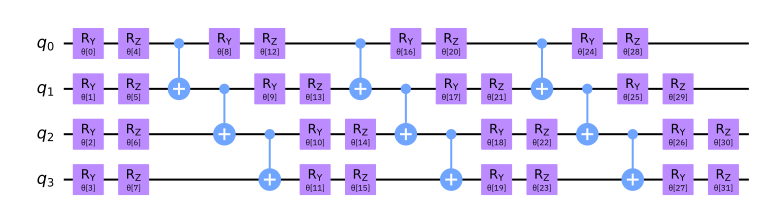

full entanglement:


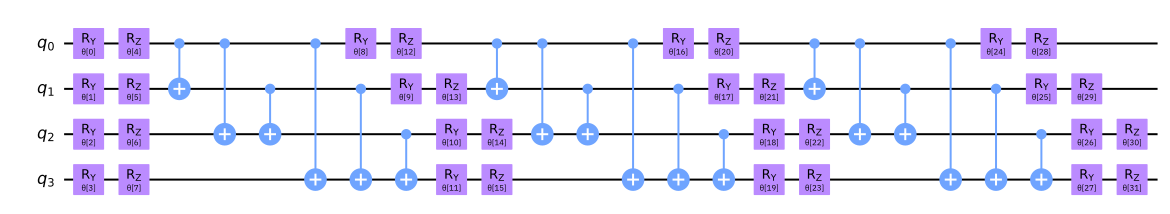

In [5]:
from qiskit.circuit.library import EfficientSU2
entanglements = ["linear", "full"]
for entanglement in entanglements:
    form = EfficientSU2(num_qubits=4, entanglement=entanglement)
    print(f"{entanglement} entanglement:")
    # We initialize all parameters to 0 for this demonstration
    display(form.decompose().draw(fold=-1))

ধরে নিন গভীরতার সেটিং $d$ এ সেট করা আছে। তারপর, RyRz-এর $2n\times (d+1)$ পরামিতি রয়েছে এবং Ry (দেখানো হয়নি) $n\times (d+1)$ পরামিতি রয়েছে৷

## কিস্কিটে VQE বাস্তবায়ন

এই বিভাগটি প্রোগ্রামেটিক পদ্ধতি ব্যবহার করে VQE এর বাস্তবায়নের চিত্র তুলে ধরেছে। Qiskit Aqua এছাড়াও একটি ঘোষণামূলক বাস্তবায়ন সক্ষম করে, তবে, এটি অন্তর্নিহিত অ্যালগরিদম সম্পর্কে কম তথ্য প্রকাশ করে। এই কোড, বিশেষ করে qubit অপারেটরদের প্রস্তুতি, Qiskit টিউটোরিয়াল রিপোজিটরিতে পাওয়া কোডের উপর ভিত্তি করে (এবং জুলাই 2019 অনুযায়ী, এখানে পাওয়া যেতে পারে: https://github.com/Qiskit/qiskit-tutorials )।

নিম্নলিখিত লাইব্রেরিগুলি প্রথমে আমদানি করতে হবে৷


In [6]:
# pylint: disable=line-too-long
from qiskit.algorithms import VQE
from qiskit_nature.algorithms import (GroundStateEigensolver,
                                      NumPyMinimumEigensolverFactory)
from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureMoleculeDriver, ElectronicStructureDriverType)
from qiskit_nature.transformers.second_quantization.electronic import FreezeCoreTransformer
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import ParityMapper
# pylint: enable=line-too-long

import matplotlib.pyplot as plt
import numpy as np
from qiskit_nature.circuit.library import UCCSD, HartreeFock
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import COBYLA, SPSA, SLSQP
from qiskit.opflow import TwoQubitReduction
from qiskit import BasicAer, Aer
from qiskit.utils import QuantumInstance
from qiskit.ignis.mitigation import CompleteMeasFitter
from qiskit.providers.aer.noise import NoiseModel

/var/folders/z_/6s4ntyps5lsb232v7f82201r0000gn/T/ipykernel_22101/2068492128.py:22: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation import CompleteMeasFitter


### Running VQE on a Statevector Simulator

আমরা বিভিন্ন আন্তঃপারমাণবিক দূরত্বে LiH-এর জন্য স্থল রাষ্ট্রীয় শক্তির গণনা প্রদর্শন করি। অনুরূপ প্রতিটি দূরত্বে অণুর জন্য একটি ড্রাইভার তৈরি করতে হবে। উল্লেখ্য যে এই পরীক্ষায়, ব্যবহৃত কিউবিটের সংখ্যা কমাতে, আমরা কোরটি হিমায়িত করি এবং দুটি অরবিটাল অপসারণ করি। প্রথমত, আমরা একটি ফাংশন সংজ্ঞায়িত করি যা একটি আন্তঃপরমাণু দূরত্ব নেয় এবং উপযুক্ত qubit অপারেটর, $H$, সেইসাথে অপারেটর সম্পর্কে কিছু অন্যান্য তথ্য প্রদান করে।

In [7]:
def get_qubit_op(dist):
    # Define Molecule
    molecule = Molecule(
        # Coordinates in Angstrom
        geometry=[
            ["Li", [0.0, 0.0, 0.0]],
            ["H", [dist, 0.0, 0.0]]
        ],
        multiplicity=1,  # = 2*spin + 1
        charge=0,
    )

    driver = ElectronicStructureMoleculeDriver(
        molecule=molecule,
        basis="sto3g",
        driver_type=ElectronicStructureDriverType.PYSCF)

    # Get properties
    properties = driver.run()
    num_particles = (properties
                        .get_property("ParticleNumber")
                        .num_particles)
    num_spin_orbitals = int(properties
                            .get_property("ParticleNumber")
                            .num_spin_orbitals)

    # Define Problem, Use freeze core approximation, remove orbitals.
    problem = ElectronicStructureProblem(
        driver,
        [FreezeCoreTransformer(freeze_core=True,
                               remove_orbitals=[-3,-2])])

    second_q_ops = problem.second_q_ops()  # Get 2nd Quant OP
    num_spin_orbitals = problem.num_spin_orbitals
    num_particles = problem.num_particles

    mapper = ParityMapper()  # Set Mapper
    hamiltonian = second_q_ops[0]  # Set Hamiltonian
    # Do two qubit reduction
    converter = QubitConverter(mapper,two_qubit_reduction=True)
    reducer = TwoQubitReduction(num_particles)
    qubit_op = converter.convert(hamiltonian)
    qubit_op = reducer.convert(qubit_op)

    return qubit_op, num_particles, num_spin_orbitals, problem, converter

প্রথমত, কিউবিট অপারেটর এবং একটি ধ্রুপদী সঠিক eigensolver ব্যবহার করে সঠিক স্থল অবস্থার শক্তি গণনা করা হয়। পরবর্তীকালে, প্রাথমিক অবস্থা $|\psi\rangle$ তৈরি করা হয়, যা VQE উদাহরণটি চূড়ান্ত ansatz $\min_{\theta}(|\psi(\theta)\rangle)$ তৈরি করতে ব্যবহার করে। প্রতিটি আন্তঃপরমাণু দূরত্বে সঠিক ফলাফল এবং VQE ফলাফল সংরক্ষণ করা হয়। লক্ষ্য করুন যে `vqe.run(backend)['energy'] + shift` দ্বারা প্রদত্ত ফলাফলটি $\min_{\theta}\left(\langle \psi(\theta)|H|\psi(\theta) পরিমাণের সমতুল্য। \rangle\right)$, যেখানে সর্বনিম্ন অগত্যা বিশ্বব্যাপী সর্বনিম্ন নয়৷

`VQE(qubit_op, var_form, optimizer, 'matrix')` দিয়ে VQE ইনস্ট্যান্স শুরু করার সময় $H$-এ $|\psi(\theta)\rangle$-এর প্রত্যাশা মান সরাসরি ম্যাট্রিক্স গুণনের মাধ্যমে গণনা করা হয়। যাইহোক, সত্যিকারের কোয়ান্টাম ডিভাইস, বা সত্যিকারের সিমুলেটর যেমন `qasm_simulator` এর সাথে `VQE(qubit_op, var_form, optimizer, 'paulis')` ব্যবহার করার সময় প্রত্যাশিত মানের গণনা আরও জটিল। একটি হ্যামিলটোনিয়ানকে একটি পাওলি স্ট্রিং এর সমষ্টি হিসাবে উপস্থাপন করা যেতে পারে, প্রতিটি পাওলি শব্দ একটি কিউবিটের উপর কাজ করে যা ম্যাপিং দ্বারা ব্যবহৃত হচ্ছে। প্রতিটি পাউলি স্ট্রিং $|\psi(\theta)\rangle$ এর সাথে সম্পর্কিত সার্কিটের সাথে একটি সংশ্লিষ্ট সার্কিট যুক্ত থাকে। পরবর্তীকালে, এই সার্কিটগুলির প্রতিটি কার্যকর করা হয়, এবং সমস্ত ফলাফল $|\psi(\theta)\rangle$-এ $H$-এর প্রত্যাশা মান নির্ধারণ করতে ব্যবহৃত হয়। নিম্নলিখিত উদাহরণে, আমরা `matrix` মোড দিয়ে VQE ইন্সট্যান্স শুরু করি, এবং তাই ম্যাট্রিক্স গুণনের মাধ্যমে প্রত্যাশার মান সরাসরি গণনা করা হয়।

উল্লেখ্য যে নিম্নলিখিত কোড স্নিপেটটি সম্পূর্ণ হতে কয়েক মিনিট সময় লাগতে পারে। 

In [8]:
def exact_solver(problem, converter):
    solver = NumPyMinimumEigensolverFactory()
    calc = GroundStateEigensolver(converter, solver)
    result = calc.solve(problem)
    return result

backend = BasicAer.get_backend("statevector_simulator")
distances = np.arange(0.5, 4.0, 0.2)
exact_energies = []
vqe_energies = []
optimizer = SLSQP(maxiter=5)

# pylint: disable=undefined-loop-variable
for dist in distances:
    (qubit_op, num_particles, num_spin_orbitals,
                             problem, converter) = get_qubit_op(dist)
    result = exact_solver(problem,converter)
    exact_energies.append(result.total_energies[0].real)
    init_state = HartreeFock(num_spin_orbitals, num_particles, converter)
    var_form = UCCSD(converter,
                     num_particles,
                     num_spin_orbitals,
                     initial_state=init_state)
    vqe = VQE(var_form, optimizer, quantum_instance=backend)
    vqe_calc = vqe.compute_minimum_eigenvalue(qubit_op)
    vqe_result = problem.interpret(vqe_calc).total_energies[0].real
    vqe_energies.append(vqe_result)
    print(f"Interatomic Distance: {np.round(dist, 2)}",
          f"VQE Result: {vqe_result:.5f}",
          f"Exact Energy: {exact_energies[-1]:.5f}")

print("All energies have been calculated")

Interatomic Distance: 0.5 VQE Result: -7.04751 Exact Energy: -7.04791
Interatomic Distance: 0.7 VQE Result: -7.50392 Exact Energy: -7.50400
Interatomic Distance: 0.9 VQE Result: -7.72278 Exact Energy: -7.72283
Interatomic Distance: 1.1 VQE Result: -7.82516 Exact Energy: -7.82520
Interatomic Distance: 1.3 VQE Result: -7.86886 Exact Energy: -7.86890
Interatomic Distance: 1.5 VQE Result: -7.88210 Exact Energy: -7.88214
Interatomic Distance: 1.7 VQE Result: -7.87917 Exact Energy: -7.87920
Interatomic Distance: 1.9 VQE Result: -7.86788 Exact Energy: -7.86799
Interatomic Distance: 2.1 VQE Result: -7.85312 Exact Energy: -7.85320
Interatomic Distance: 2.3 VQE Result: -7.83763 Exact Energy: -7.83772
Interatomic Distance: 2.5 VQE Result: -7.82324 Exact Energy: -7.82343
Interatomic Distance: 2.7 VQE Result: -7.81116 Exact Energy: -7.81142
Interatomic Distance: 2.9 VQE Result: -7.80195 Exact Energy: -7.80215
Interatomic Distance: 3.1 VQE Result: -7.79516 Exact Energy: -7.79545
Interatomic Distance

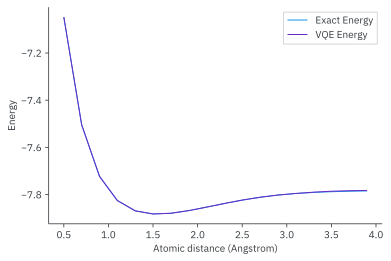

In [9]:
plt.plot(distances, exact_energies, label="Exact Energy")
plt.plot(distances, vqe_energies, label="VQE Energy")
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy')
plt.legend()
plt.show()

মনে রাখবেন যে VQE ফলাফলগুলি সঠিক ফলাফলের খুব কাছাকাছি, এবং তাই VQE বক্ররেখা দ্বারা সঠিক শক্তি বক্ররেখা লুকানো হয়।

### একটি শোরগোল সিমুলেটরে VQE চালানো

এখানে, আমরা একটি গোলমাল সিমুলেটর এবং ত্রুটি প্রশমন ব্যবহার করে H$_2$ এর জন্য স্থল অবস্থার শক্তি গণনা করি।

প্রথমত, আমরা অণুর হ্যামিলটোনিয়ান প্রতিনিধিত্বকারী কিউবিট অপারেটর প্রস্তুত করি:

In [10]:
molecule = Molecule(
    geometry=[["H", [0.0, 0.0, -0.3625]],
              ["H", [0.0, 0.0, 0.3625]]],
    multiplicity=1,charge=0)

driver = ElectronicStructureMoleculeDriver(
    molecule=molecule,
    basis="sto3g",
    driver_type=ElectronicStructureDriverType.PYSCF)

problem = ElectronicStructureProblem(driver)

second_q_ops = problem.second_q_ops()  # Get 2nd Quant OP
num_spin_orbitals = problem.num_spin_orbitals
num_particles = problem.num_particles

mapper = ParityMapper()  # Set Mapper

hamiltonian = second_q_ops[0]  # Set Hamiltonian

# Do two qubit reduction
converter = QubitConverter(mapper,two_qubit_reduction=True)
reducer = TwoQubitReduction(num_particles)
qubit_op = converter.convert(hamiltonian)
qubit_op = reducer.convert(qubit_op)

এখন, আমরা IBMQ প্রদানকারী থেকে একটি ডিভাইস কাপলিং ম্যাপ এবং নয়েজ মডেল লোড করি এবং একটি কোয়ান্টাম উদাহরণ তৈরি করি, ত্রুটি প্রশমন সক্ষম করে:

In [11]:
from qiskit.test.mock import FakeManila
from qiskit.providers.aer import QasmSimulator

backend = Aer.get_backend('aer_simulator')
device_backend = FakeManila()
device = QasmSimulator.from_backend(device_backend)
NOISE_MODEL = None
coupling_map = device.configuration().coupling_map
NOISE_MODEL = NoiseModel.from_backend(device)
coupling_map = device.configuration().coupling_map
qi= QuantumInstance(backend,
                    coupling_map=coupling_map,
                    noise_model=NOISE_MODEL,
                    measurement_error_mitigation_cls=CompleteMeasFitter)

সবশেষে, আমাদের অবশ্যই অপ্টিমাইজার, ভ্যারিয়েশনাল ফর্ম এবং VQE ইনস্ট্যান্স কনফিগার করতে হবে। দুটি কিউবিট গেট সার্কিটের গভীরতা বৃদ্ধির সাথে সাথে শব্দের প্রভাব বৃদ্ধির সাথে সাথে, আমরা UCCSD-এর পরিবর্তে একটি হিউরিস্টিক ভ্যারিয়েশনাল ফর্ম (RYRZ) ব্যবহার করি কারণ RYRZ-এর UCCSD-এর তুলনায় অনেক অগভীর সার্কিট রয়েছে এবং যথেষ্ট পরিমাণে কম দুটি কিউবিট গেট ব্যবহার করে৷

নিম্নলিখিত কোডটি সম্পূর্ণ হতে কয়েক মিনিট সময় লাগতে পারে।

In [12]:
result = exact_solver(problem,converter)
exact_energies.append(result.total_energies)

print("Exact Result:", result.total_energies)
optimizer = SPSA(maxiter=100)
var_form = EfficientSU2(qubit_op.num_qubits, entanglement="linear")
vqe = VQE(var_form, optimizer=optimizer,quantum_instance=qi)
vqe_calc=vqe.compute_minimum_eigenvalue(qubit_op)
vqe_result=np.real(problem.interpret(vqe_calc).total_energies)
print("VQE Result:", vqe_result)

Exact Result: [-0.93317257]
VQE Result: [-0.93190611]


যখন গোলমাল প্রশমন সক্ষম করা হয়, যদিও ফলাফল রাসায়নিক নির্ভুলতার মধ্যে পড়ে না (সঠিক ফলাফলের 0.0016 হার্ট্রির মধ্যে হিসাবে সংজ্ঞায়িত), এটি সঠিক সমাধানের মোটামুটি কাছাকাছি। 

## সমস্যা

1. আপনাকে একটি হ্যামিলটোনিয়ান $H$ দেওয়া হয়েছে এই প্রতিশ্রুতি দিয়ে যে এর স্থল অবস্থা একটি সর্বাধিক জড়ানো $n$ কুবিট রাজ্যের কাছাকাছি। ব্যাখ্যা করুন কোন পরিবর্তনশীল ফর্ম (বা ফর্ম) দক্ষতার সাথে এবং সঠিকভাবে $H$ এর স্থল অবস্থার শক্তি শিখতে পারে। আপনি আপনার নিজস্ব পরিবর্তনশীল ফর্ম তৈরি করে উত্তর দিতে পারেন এবং ব্যাখ্যা করতে পারেন কেন এটি এই হ্যামিলটোনিয়ানের সাথে ব্যবহারের জন্য উপযুক্ত।
2. COBYLA অপ্টিমাইজার, 1000 শট সহ `qasm_simulator` এবং 60টি পাউলি স্ট্রিং সহ একটি হ্যামিলটোনিয়ান ব্যবহার করার সময়, প্রতি অপ্টিমাইজেশান পুনরাবৃত্তির জন্য সম্পাদিত সার্কিট মূল্যায়নের সংখ্যা গণনা করুন।
3. $1.3$Å এর আন্তঃপরমাণু দূরত্বের সাথে BeH$_2$ এর স্থল অবস্থার শক্তি অনুমান করতে VQE ব্যবহার করুন। আপনি `atom="Li .0 .0 .0; H .0 .0 " + str(dist)` কে `atom="Be .0 .0 .0; H .0 .0 -" + str(dist) + "; H .0 .0 " + str(dist)` দিয়ে প্রতিস্থাপন করে `get_qubit_op(dist)` ফাংশনটি পুনরায় ব্যবহার করতে পারেন `atom="Be .0 .0 .0; H .0 .0 -" + str(dist) + "; H .0 .0 " + str(dist)` এবং <code>get_qubit_op(1.3)</code> দিয়ে ফাংশনটি চালু করা হচ্ছে। মনে রাখবেন যে অরবিটালগুলি অপসারণ করা এই অণুর জন্য রাসায়নিক নির্ভুলতা সংরক্ষণ করে না। যাইহোক, প্রয়োজনীয় কিউবিটের সংখ্যা 6-এ নামিয়ে আনতে (এবং এর ফলে বেশিরভাগ ল্যাপটপে দক্ষ সিমুলেশনের অনুমতি দেওয়া হয়), নির্ভুলতার ক্ষতি গ্রহণযোগ্য। এই অনুশীলনের সুযোগের বাইরে থাকাকালীন, আগ্রহী পাঠক কোনও রাসায়নিক নির্ভুলতা না হারিয়ে প্রয়োজনীয় কিউবিটের সংখ্যা 7 এ কমাতে কিউবিট টেপারিং অপারেশন ব্যবহার করতে পারেন।

## References

1. Peruzzo, Alberto, et al. "A variational eigenvalue solver on a photonic quantum processor." *Nature communications* 5 (2014): 4213.
2. Griffiths, David J., and Darrell F. Schroeter. Introduction to quantum mechanics. *Cambridge University Press*, 2018.
3. Shende, Vivek V., Igor L. Markov, and Stephen S. Bullock. "Minimal universal two-qubit cnot-based circuits." arXiv preprint quant-ph/0308033 (2003).
4. Kandala, Abhinav, et al. "Hardware-efficient variational quantum eigensolver for small molecules and quantum magnets." Nature 549.7671 (2017): 242.

In [13]:
#pylint: disable=unused-import
import qiskit.tools.jupyter
%qiskit_version_table

Qiskit Software,Version
qiskit-terra,0.20.2
qiskit-aer,0.9.1
qiskit-ignis,0.7.1
qiskit-ibmq-provider,0.19.1
qiskit-aqua,0.9.5
qiskit,0.36.2
qiskit-nature,0.4.1
qiskit-finance,0.3.2
qiskit-optimization,0.3.2
qiskit-machine-learning,0.4.0
